In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath


In [2]:
sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))

In [3]:
%run load_Results.py

In [4]:
wt00 = np.where(gold0 == 1, 1/.064, 1)

In [5]:
# this is best so far,.default
wts01 = np.where(gold1 == 1, 1/.02, 1)
wts02 = np.where(gold2 == 1, 2/.02, 2)
wts03 = np.where(gold3 == 1, 3/.02, 3)
wts04 = np.where(gold4 == 1, 4/.02, 4)

In [23]:
wts01 = np.where(gold1 == 1,1/(np.mean(gold0)), 1/(1-mp1) )
wts02 = np.where(gold2 == 1,1/(np.mean(gold0)), 2/((1-mp2)) )
wts03 = np.where(gold3 == 1,1/(np.mean(gold0)), 3/((1-mp3)) )
wts04 = np.where(gold4 == 1,1/(np.mean(gold0)), 4/((1-mp4)))

In [1524]:
# this is best so far,.default
wts01 = np.where(gold1 == 1, 1/.064, 1)
wts02 = np.where(gold2 == 1, 1/.064, 2)
wts03 = np.where(gold3 == 1, 1/.064, 3)
wts04 = np.where(gold4 == 1, 1/.064, 4)

In [35]:
wts01 = np.where(gold1 == 1, 1/(np.mean(gold0)* (1-mp1) **.5), 1/ mp1**.5)
wts02 = np.where(gold2 == 1, 1/(np.mean(gold0)* (1-mp2) **.5), 2/ mp2**.5)
wts03 = np.where(gold3 == 1, 1/(np.mean(gold0)* (1-mp3) **.5), 3/ mp3**.5)
wts04 = np.where(gold4 == 1, 1/(np.mean(gold0)* (1-mp4) **.5), 4/ mp4**.5)


In [56]:
wts01 = np.where(gold1 == 1, 1/np.mean(gold1), 1/(1-np.mean(gold1)))
wts02 = np.where(gold2 == 1, 1/np.mean(gold2), 2/(1-np.mean(gold2)))
wts03 = np.where(gold3 == 1, 1/np.mean(gold3), 3/(1-np.mean(gold3)))
wts04 = np.where(gold4 == 1, 1/np.mean(gold4), 4/(1-np.mean(gold4)))

In [58]:
wts1234 = np.concatenate((wts01,wts02, wts03, wts04))
y1234 = np.concatenate((gold1,gold2, gold3, gold4))
lo1234 = logit( np.concatenate((mp1,mp2, mp3, mp4)) )
tlo1234 = logit( np.concatenate((tp1,tp2, tp3, tp4)) )
ti = np.concatenate((np.ones(len(mp1)), 2*np.ones(len(mp2)), 3*np.ones(len(mp3)), 4*np.ones(len(mp4))))
tti = np.concatenate((np.ones(len(tp1)), 2*np.ones(len(tp2)), 3*np.ones(len(tp3)), 4*np.ones(len(tp4))))

In [59]:
def weighted_temp2_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits + t[1]) /  t [0]  
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

In [60]:
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit + alpha[1])/ alpha[0]     
    proba = expit ( logi   ) #*tt.x[5]    
    return proba

In [61]:
alpha_t_1234  = weighted_temp2_scaling(  lo1234 , y1234,  wts1234)


In [62]:
pc = temp_pred2(alpha_t_1234, tlo1234 )

In [62]:
pc = temp_pred2(alpha_t_1234, tlo1234 )

(array([ 7755., 10692.,  8776.,  7368.,  6468.,  5651.,  4055.,  2613.,
         1308.,   182.]),
 array([0.0392678 , 0.1168307 , 0.19439361, 0.27195652, 0.34951942,
        0.42708233, 0.50464524, 0.58220814, 0.65977105, 0.73733396,
        0.81489686]),
 <BarContainer object of 10 artists>)

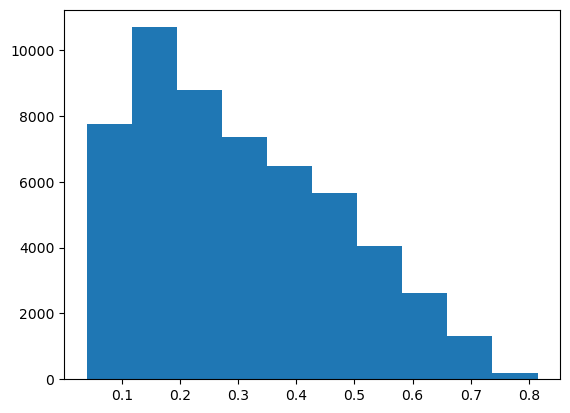

In [63]:
plt.hist(pc)

In [64]:
wp1 =  pc [tti==1]
wp2 =  pc [tti==2]
wp3 =  pc [tti==3]
wp4 =  pc [tti==4]

In [65]:

y01, p01 = calibration_curve(M_test1['golds'], wp1 , n_bins = 600)
y02, p02 = calibration_curve(M_test2['golds'], wp2 , n_bins = 600)
y03, p03 =calibration_curve(M_test3['golds'], wp3 , n_bins = 300)
y04, p04 = calibration_curve(M_test4['golds'], wp4 , n_bins = 200)


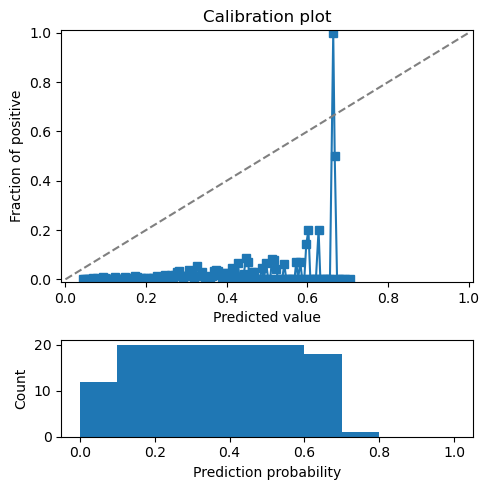

In [66]:
plotter(p04, y04)

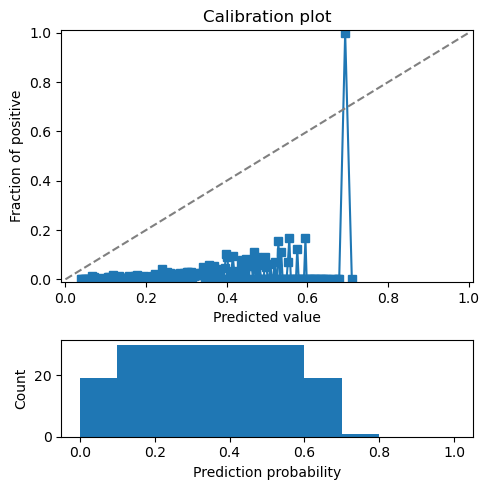

In [67]:
plotter(p03, y03)

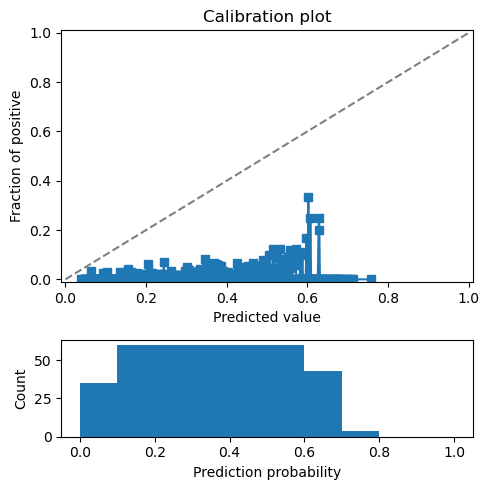

In [68]:
plotter(p02, y02)c

In [69]:
import sklearn
from sklearn.metrics import confusion_matrix

In [70]:
[sklearn.metrics.roc_auc_score(tgold4,  tp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  tp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  tp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  tp1 , average = 'samples')]


[0.754709382855384, 0.7132108023602834, 0.6764938403022082, 0.6667921165559247]

In [71]:
[sklearn.metrics.roc_auc_score(tgold4,  wp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  wp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  wp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  wp1 , average = 'samples')]

[0.754709382855384, 0.7132108023602834, 0.6764938403022082, 0.6667921165559247]

In [52]:
( confusion_matrix (tgold1,  wp1>.5) )

array([[11826,  3826],
       [  276,   204]], dtype=int64)

In [53]:
( confusion_matrix (tgold2,  wp2>.5) )

array([[13724,   282],
       [  212,     8]], dtype=int64)

In [54]:
( confusion_matrix (tgold3,  wp3>.5) )

array([[12585,    91],
       [  150,     3]], dtype=int64)

In [55]:
( confusion_matrix (tgold4,  wp4>.5) )

array([[11479,   101],
       [   94,     7]], dtype=int64)

In [ ]:
np1 =  (1-pc) [ti==1]
np2 =  (1-pc) [ti==2]
np3 =  (1-pc) [ti==3]
np4 =  (1-pc) [ti==4]

In [1534]:
wts1 = np.where(gold1 == 1, 1/( np1 *np.mean(gold1)), 1/ wp1)
wts2 = np.where(gold2 == 1, 1/( np2 *np.mean(gold2)), 2/ wp2)
wts3 = np.where(gold3 == 1, 1/( np3 *np.mean(gold3)), 3/wp3 )
wts4 = np.where(gold4 == 1, 1/( np4 *np.mean(gold4)), 4/wp4 )

In [1535]:
def temperature_multi_w(l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1 +  t[1])  / t[5] 
        logi_2 = (l2 +  t[2])  / t[6] 
        logi_3 = (l3 +  t[3])  / t[7] 
        logi_4 = (l4 +  t[4])  / t[8] 
        p1  = expit (t[0] + logi_1  )  
        p2  = expit ( t[0] + logi_2  )  
        p3  = expit (t[0] +  logi_3  )  
        p4  = expit ( t[0] + logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1, .1,.1, .1, .1  ] )    
    return  r

In [1536]:
tt  = temperature_multi_w( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [1537]:
tt['message']

'Optimization terminated successfully.'

In [1538]:
def temp_pred  ( j1,j2, test_logit):    
    
    logi =  ( test_logit   + j1) / j2     
    proba = expit (  logi + tt.x[0]  )  
    return proba

In [1539]:
cal_1 = temp_pred(tt.x[1],tt.x[5], logit(tp1) )
cal_2 = temp_pred(tt.x[2],tt.x[6], logit(tp2) )
cal_3 = temp_pred(tt.x[3],tt.x[7], logit(tp3) )
cal_4 = temp_pred(tt.x[4],tt.x[8], logit(tp4) )

y1, p1 = calibration_curve(M_test1['golds'], cal_1 , n_bins = 600)
y2, p2 = calibration_curve(M_test2['golds'], cal_2 , n_bins = 600)
y3, p3 =calibration_curve(M_test3['golds'], cal_3 , n_bins = 300)
y4, p4 = calibration_curve(M_test4['golds'], cal_4 , n_bins = 200)



(array([8.046e+03, 1.778e+03, 7.560e+02, 4.660e+02, 2.560e+02, 1.890e+02,
        1.070e+02, 6.100e+01, 1.400e+01, 8.000e+00]),
 array([0.00265837, 0.07388229, 0.14510622, 0.21633014, 0.28755406,
        0.35877799, 0.43000191, 0.50122583, 0.57244975, 0.64367368,
        0.7148976 ]),
 <BarContainer object of 10 artists>)

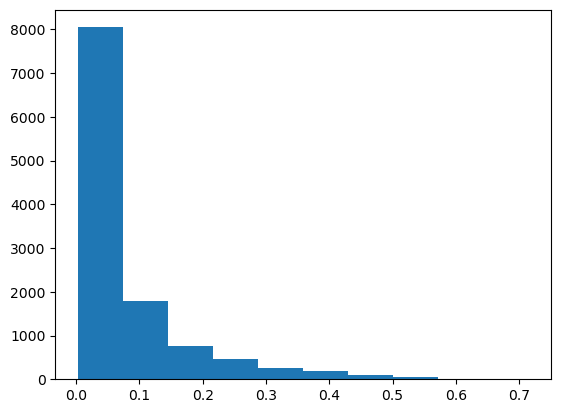

In [1540]:
plt.hist(cal_4)

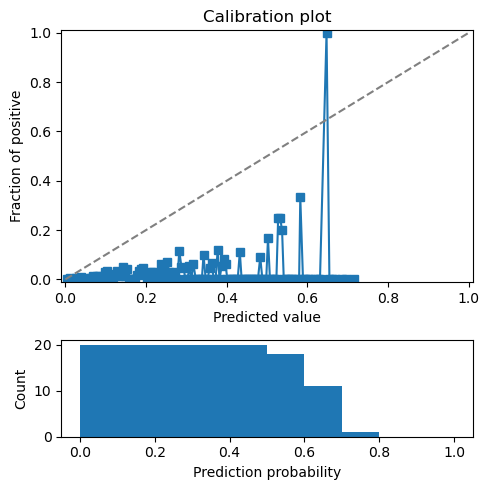

In [1541]:
plotter(p4, y4)

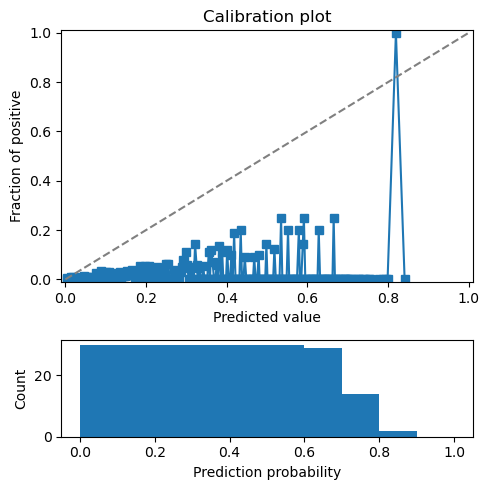

In [1542]:
plotter(p3, y3)


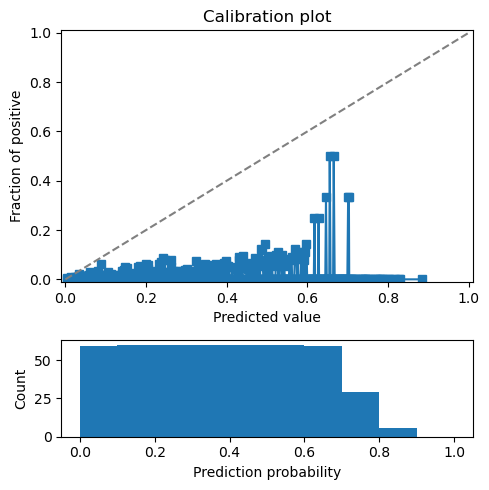

In [1543]:
plotter(p2, y2)

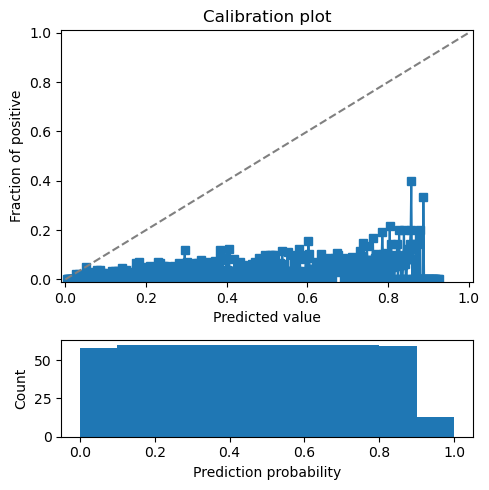

In [1544]:
plotter(p1, y1)

In [1028]:
temp4 = weighted_temp2_scaling_i(logit(mp4), gold4, wts4)

In [1029]:
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit   + alpha[1] )/ alpha[0]      
    proba = expit ( logi  )              #*tt.x[5]    
    return proba

In [1030]:
temp4

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.6284422147144466
        x: [ 1.481e+00  1.620e+00]
      nit: 23
      jac: [-4.545e-07 -3.949e-07]
 hess_inv: [[ 4.646e+01 -2.643e+01]
            [-2.643e+01  2.481e+01]]
     nfev: 75
     njev: 25

In [1031]:
cal_4 = temp_pred2 ( temp4.x, logit(tp4) )


In [ ]:
tt5  = temperature_multi_5( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [164]:
def temp_pred5  ( j1, test_logit):    
    logi =  ( test_logit   + j1)   
    proba = expit (  logi / tt.x[0]  )  
    return proba

In [20]:
import sklearn
from sklearn.metrics import confusion_matrix

In [224]:
sklearn.metrics.roc_auc_score(tgold3,  tc3 , average = 'samples')


sklearn.metrics.roc_auc_score(tgold4,  tc4 , average = 'samples')


sklearn.metrics.roc_auc_score(tgold1,  tc1 , average = 'samples')


In [226]:
( confusion_matrix (tgold1,  tc1>.5) )

array([[8111, 7408],
       [ 145,  361]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [231]:
( confusion_matrix (tgold1,  tp1>.05) )

array([[ 1657, 13862],
       [   10,   496]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)